In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model  import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline  import make_pipeline
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve

In [15]:
link = '/content/drive/MyDrive/Saber ML Course/assignment 3/breast_cancer.csv'
data =  pd.read_csv(link,encoding='utf-8')

In [30]:
data.shape

(569, 31)

# Preprocessing data

**get rid of useless data**

In [16]:
data = data.drop('Unnamed: 32',axis = 1)
data = data.drop('id',axis = 1)

In [19]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

**encoding labels**

In [25]:
le = LabelEncoder()
y = le.fit_transform(y)

In [26]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x,
    y, 
    test_size=0.20,
    stratify=y,
    random_state=1
)

# large data / Holdout method /Pipeline 


**logistic Regression**

In [35]:
pipe_lr = make_pipeline(
    SequentialFeatureSelector(
        estimator=LogisticRegression(random_state=1),
        n_features_to_select=20,
        direction='backward'
    ),
    StandardScaler(),
    #PCA(n_components=10),
    LogisticRegression(random_state=1)
)
pipe_lr.fit(x_train,y_train)
y_pred = pipe_lr.predict(x_valid)
accuracy_score(y_valid,y_pred)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.9736842105263158

**Random Forest**

In [47]:
pipe_rf = make_pipeline(
    #StandardScaler(),
    #PCA(n_components=2),
    RandomForestClassifier(n_estimators=30,random_state=1,max_depth=10)
)
pipe_rf.fit(x_train,y_train)
y_pred = pipe_rf.predict(x_valid)
accuracy_score(y_valid,y_pred)

0.956140350877193

# K-Fold Cross-Validation method / Used with medium



**logistic Regression**

In [63]:
pipe_lr = make_pipeline(
    StandardScaler(),
    #PCA(n_components=2),
    LogisticRegression(random_state=1))

scores = cross_val_score(
    estimator=pipe_lr,
    X=x,
    y=y,
    scoring='accuracy',
    cv=10
)
print('CV accuracy scores:',  scores)
print('CV accuracy:', (np.mean(scores), np.std(scores)))


CV accuracy scores: [0.98245614 0.98245614 0.98245614 0.96491228 0.98245614 0.98245614
 0.94736842 1.         1.         0.98214286]
CV accuracy: (0.9806704260651629, 0.01456955548732776)


**Random Forest**

In [64]:
pipe_rf = make_pipeline(
    #StandardScaler(),
    #PCA(n_components=2),
    RandomForestClassifier(n_estimators=30, random_state=1, max_depth=20)
)

scores = cross_val_score(
    estimator=pipe_rf,
    X=x,
    y=y,
    scoring='accuracy',
    cv=10
)
print('CV accuracy scores:',  scores)
print('CV accuracy:', (np.mean(scores), np.std(scores)))


CV accuracy scores: [0.98245614 0.89473684 0.92982456 0.96491228 0.98245614 0.98245614
 0.98245614 0.98245614 0.94736842 0.96428571]
CV accuracy: (0.9613408521303258, 0.02806297179764937)


# Leave-One-Out Cross-Validation method / Used with small


**logistic Regression**

In [70]:
pipe_lr = make_pipeline(
    StandardScaler(),
    #PCA(n_components=2),
    LogisticRegression(random_state=1,solver='lbfgs'))

scores = cross_val_score(
    estimator=pipe_lr,
    X=x,
    y=y,
    scoring='accuracy',
    cv=LeaveOneOut()
)
print('CV accuracy scores:',  scores)
print('CV accuracy:', (np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

**Random Forest**

In [72]:
pipe_rf = make_pipeline(
    #StandardScaler(),
    #PCA(n_components=2),
    RandomForestClassifier(n_estimators=30, random_state=1, max_depth=20)
)
scores = cross_val_score(
    estimator=pipe_rf,
    X=x,
    y=y,
    scoring='accuracy',
    cv=LeaveOneOut()
)
print('CV accuracy scores:',  scores)
print('CV accuracy:', (np.mean(scores), np.std(scores)))

CV accuracy scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

# Fine-Tuning via Grid Search


**Random Forest cv = 10**

In [83]:
forest = RandomForestClassifier(random_state=1)
max_depth_range = [5, 10, 20, 30]
n_estimators_range = [5, 10, 20,30]
param_grid =[{
    'max_depth':max_depth_range,
    'n_estimators':n_estimators_range
}]

gs = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    scoring='accuracy',
    refit=True,
    cv=10
)
gs.fit(x,y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [5, 10, 20, 30],
                          'n_estimators': [5, 10, 20, 30]}],
             scoring='accuracy')

In [84]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 30}

In [85]:
gs.best_score_

0.9613408521303258

Random Forest cv = 31

In [86]:
forest = RandomForestClassifier(random_state=1)
max_depth_range = [5, 10, 20, 30]
n_estimators_range = [5, 10, 20,30]
param_grid =[{
    'max_depth':max_depth_range,
    'n_estimators':n_estimators_range
}]

gs = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    scoring='accuracy',
    refit=True,
    cv=LeaveOneOut()
)
gs.fit(x,y)

GridSearchCV(cv=LeaveOneOut(), estimator=RandomForestClassifier(random_state=1),
             param_grid=[{'max_depth': [5, 10, 20, 30],
                          'n_estimators': [5, 10, 20, 30]}],
             scoring='accuracy')

In [87]:
gs.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [88]:
gs.best_score_

0.9578207381370826

# [3] Debugging with Validation Curves


In [94]:
forest = RandomForestClassifier(n_estimators=30, random_state=1)
max_depth_range = [5, 10, 20, 30]
train_scores, test_scores = validation_curve(
    estimator=forest,
    X=x,
    y=y,
    param_name='max_depth',
    param_range=max_depth_range,
    cv=10
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

In [95]:
train_mean

array([0.99375152, 0.99863319, 0.99863319, 0.99863319])

In [96]:
test_mean

array([0.95432331, 0.96134085, 0.96134085, 0.96134085])

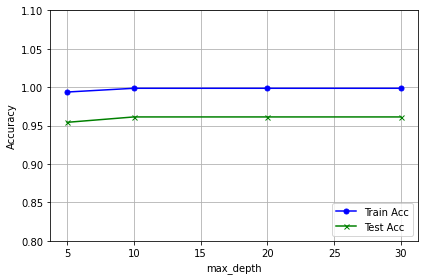

In [97]:
plt.plot(
    max_depth_range, 
    train_mean, 
    color='blue',
    marker='o',
    markersize=5,
    label='Train Acc'
)

plt.plot(
    max_depth_range, 
    test_mean, 
    color='green',
    marker='x',
    markersize=5,
    label='Test Acc'
)

plt.grid()
plt.legend(loc='lower right')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.1])
plt.tight_layout()
plt.show()